In [198]:
!pip install pyecharts

In [199]:
!pip install snownlp

In [200]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.charts import Line

import re
import jieba
from itertools import chain  # 二维，一维列表转换
from collections import Counter
from wordcloud import WordCloud

In [201]:
# 设置字体，坐标轴等
# sns.set(style='darkgrid', font_scale=1.2)  # 背景黑色 有网格    普通字体的1.2倍
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'simhei' # 设置为中文字体
plt.rcParams["axes.unicode_minus"] = False  # 坐标轴支持负号
import matplotlib
myfont = matplotlib.font_manager.FontProperties(family=r"/content/simhei.ttf")#axis


In [202]:
# 数据导入
data = pd.read_csv(r'/content/莲花楼豆瓣.csv',encoding='utf-8' )
# 数据概览
data.head()

,page,name,rate,time,IP,favor,comment
0,1,?娘卷卷?,未知,2024/2/3 16:20,北京,64,这部郭虎怎么这么正常，完全是OK的呀。整体还不错，最受不了的bug是他们都认不出来李相夷……...
1,1,浅蓝大肥猫,5,2024/1/25 23:03,北京,1186,终于看完了，前面还不觉得有什么好，没想到看完大结局之后越想越上头，彻底迷上了。虽然分集和分场...
2,1,蟲,4,2024/3/20 22:05,上海,62,前18集快进掉感情线，从编剧第18集起四星。整体反转构思致敬钱德勒的典中典《漫长的告别》、李...
3,1,古始渐中上更全,5,2023/12/11 0:47,上海,1802,曾经最强的人变成一个半死不活，满嘴跑火车的老狐狸，带着单纯正义小徒弟和半失忆凶恶大反派（误）...
4,1,伊夏,4,2024/1/6 3:23,江苏,524,没想过一个质感这么差的电视剧可以讲这么深的人生道理，比起世界上太多花一百万放十块钱的屁的事情...


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   page     600 non-null    int64 
 1   name     600 non-null    object
 2   rate     600 non-null    object
 3   time     600 non-null    object
 4   IP       599 non-null    object
 5   favor    600 non-null    int64 
 6   comment  600 non-null    object
dtypes: int64(2), object(5)
memory usage: 32.9+ KB


In [204]:
# 2).处理缺失值
# 可以看见Comment中缺失值，这里使用‘无’填充，在停用词部分，‘无’会被删除，不会影响词频统计
data.comment.fillna('无', inplace=True)
print(data.isnull().sum())

page       0
name       0
rate       0
time       0
IP         1
favor      0
comment    0
dtype: int64


In [205]:
# 3).重复值处理
# 重复值查看 duplicated()返回的是去除一次之后重复的部分
print(data.duplicated().sum())
data[data.duplicated()].shape

0


(0, 7)

In [206]:
# 删除重复值
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0


In [207]:
# 4).文本清洗，主要删除特殊符号

re_obj = re.compile(r'[/(^\s*)|(\s*$)/g, " "]+')

# 删除符号
def clear(text):
    return re_obj.sub('', text)

data.comment = data.comment.apply(clear)

In [208]:
data.head()

,page,name,rate,time,IP,favor,comment
0,1,?娘卷卷?,未知,2024/2/3 16:20,北京,64,这部郭虎怎么这么正常，完全是OK的呀。整体还不错，最受不了的bu是他们都认不出来李相夷……结...
1,1,浅蓝大肥猫,5,2024/1/25 23:03,北京,1186,终于看完了，前面还不觉得有什么好，没想到看完大结局之后越想越上头，彻底迷上了。虽然分集和分场...
2,1,蟲,4,2024/3/20 22:05,上海,62,前18集快进掉感情线，从编剧第18集起四星。整体反转构思致敬钱德勒的典中典《漫长的告别》、李...
3,1,古始渐中上更全,5,2023/12/11 0:47,上海,1802,曾经最强的人变成一个半死不活，满嘴跑火车的老狐狸，带着单纯正义小徒弟和半失忆凶恶大反派（误）...
4,1,伊夏,4,2024/1/6 3:23,江苏,524,没想过一个质感这么差的电视剧可以讲这么深的人生道理，比起世界上太多花一百万放十块钱的屁的事情...


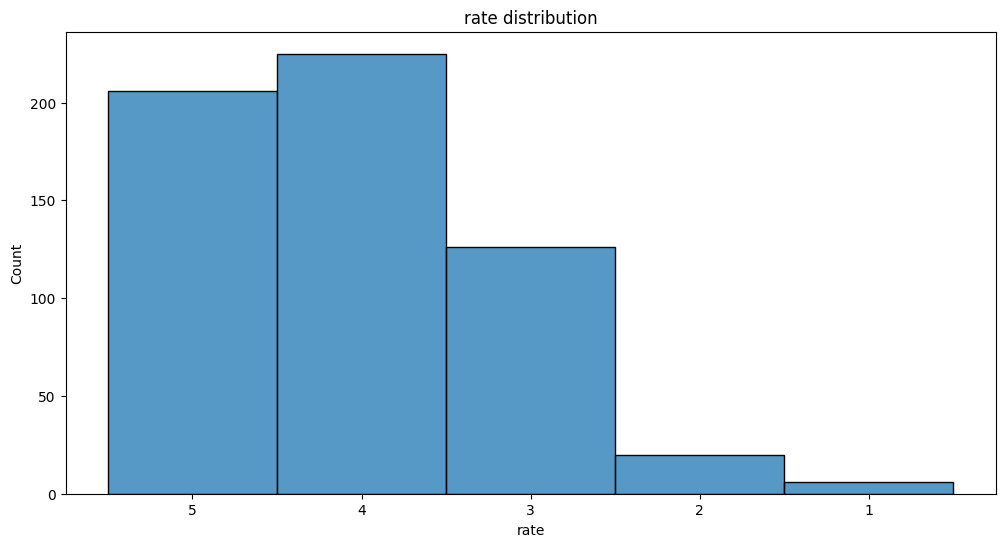

In [209]:
# 删除非数字值
data = data[data['rate'] != '未知']
# 绘制分布图
plt.figure(figsize=(12, 6))
sns.histplot(data['rate'], kde=False)
plt.title('rate distribution')
plt.show()

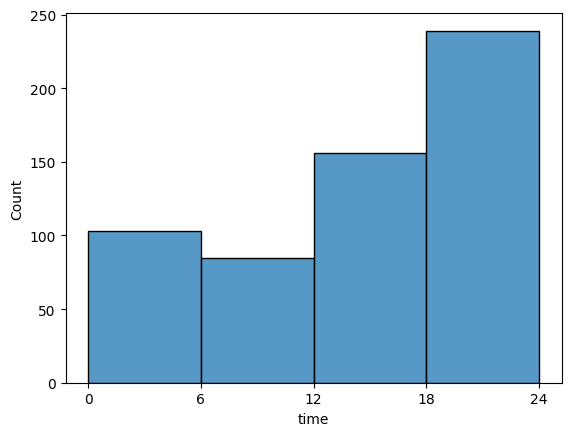

In [210]:
# 查看一天中评论分布情况
data['time'] = pd.to_datetime(data['time'])
hour = data.time.dt.hour
time_period = [0, 6, 12, 18, 24]
ax = sns.histplot(hour, bins=time_period)
ax.set_xticks(time_period)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

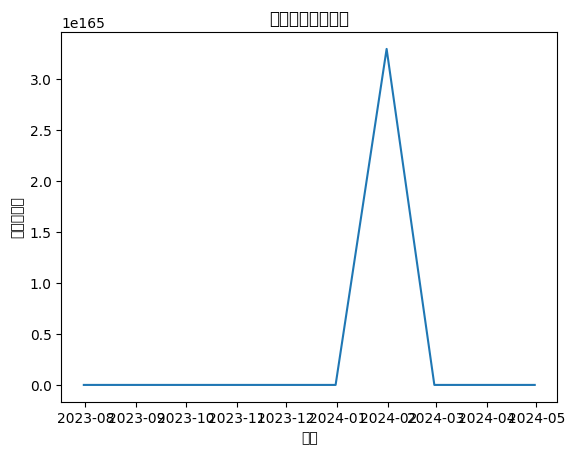

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


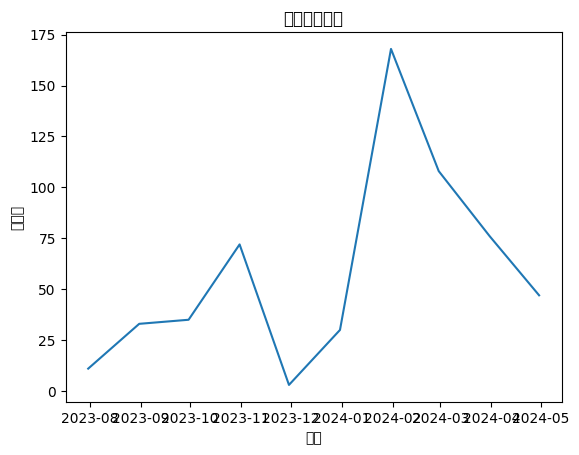

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你有一个名为 data 的 DataFrame，包含 'time'、'rate' 和 'comment' 列，可以根据你的实际情况进行调整

# 将列名统一为小写（如果有必要）
data.columns = data.columns.str.lower()

# 将 'time' 列转换为日期时间类型
data['time'] = pd.to_datetime(data['time'])

# 检查是否存在 'time' 列
if 'time' in data.columns:
    # 将 'time' 列设置为索引
    data.set_index('time', inplace=True)
else:
    raise KeyError("Column 'time' does not exist in the DataFrame.")

# 将数据按月份降采样，计算评分的平均值和评论数
Rate_trend = data.resample('M').agg({'rate':'mean', 'comment':'count'})

# 绘制评分趋势图
plt.plot(Rate_trend.index, Rate_trend['rate'])
plt.xlabel('时间')
plt.ylabel('评分平均值')
plt.title('评分平均值趋势图')

# 绘制评论数趋势图
plt.figure()
plt.plot(Rate_trend.index, Rate_trend['comment'])
plt.xlabel('时间')
plt.ylabel('评论数')
plt.title('评论数趋势图')

# 显示图形
plt.show()

In [212]:
#Rate_trend数据
Rate_trend

,rate,comment
time,,
2023-07-31,4131395858.454545,11
2023-08-31,16222289531680469453697928134656.0,33
2023-09-30,1290126987289558675121564469428224.0,35
2023-10-31,6145215910493531947471329681443378768438057632...,72
2023-11-30,110.333333,3
2023-12-31,15184518481484816134753484800.0,30
2024-01-31,3294305628300913721517895917045761370494531110...,168
2024-02-29,4187456791244846551990671934322971027586643509...,108
2024-03-31,5703084665177046053062791735250182824917743013...,76


In [213]:
import pandas as pd

data = pd.read_csv('莲花楼豆瓣.csv')

# 按 'favor' 列降序排序
sorted_data = data.sort_values(by='favor', ascending=False)

# 删除重复的 'comment'
data_without_duplicates = sorted_data.drop_duplicates(subset='comment')

# 选择前十条记录
top_10_comments = data_without_duplicates.head(10)

# 打印前十条评论
print(top_10_comments['comment'])

57                   从李相夷到李莲花，从渡己到渡人，是死局，亦是生局。期待成毅明年英雄志。
28            非常让人上头的剧，感谢这段时间莲花楼给我带来的追剧快乐，但是这个结局真的快乐不起来?
30     《唐朝诡事录》之后又一部精品探案剧，三男主互动格外有戏，成毅吐血和哭红眼的场面一贯精彩，还有...
480    有些人弃剑如遗，有些人终身不负做人当如李莲花，该放下的都放下荆门蓬草扫坟花，十里迢迢赴碧纱斯...
79     剧情紧凑，快节奏高智商武侠探案，很惊喜。前面很好看，皇宫篇有些经不起推敲。成毅眼中含泪的演技...
183                                         热血武侠探案，打戏特别燃
260    难寻少年时，总有少年来，不做神仙的成毅这不也挺有趣，曾舜晞角色精髓抓的也好，改动不少，不过可...
101    剧版改编得很好，成毅演得极好，正是我心目中的李相夷和李莲花。方小宝也很好，三人组更是其乐融融...
120    确实有经典武侠那味儿了，全程专心主线剧情，不搞情情爱爱，快意恩仇，侠义江湖，挺好挺好，最后的...
24     不抱期待而来，被方小狗可爱到了，李莲花有两只小狗，一只狐狸精，一只方多病。更新：节奏很快，各...
Name: comment, dtype: object
